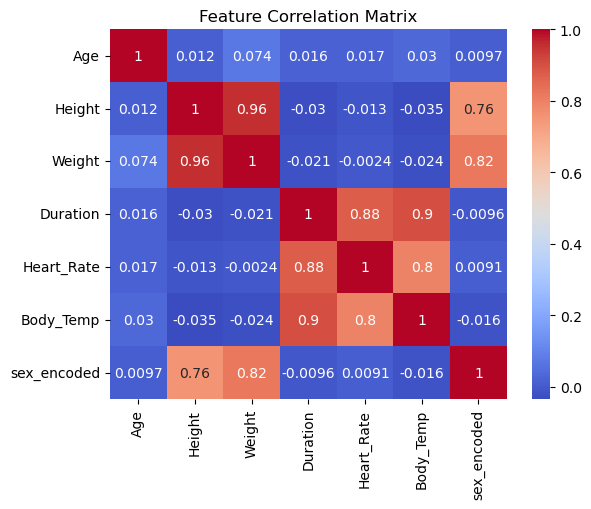

Ridge Regression RMSE: 11.05877206163471
Ridge Regression RMSLE: 0.565232085361271


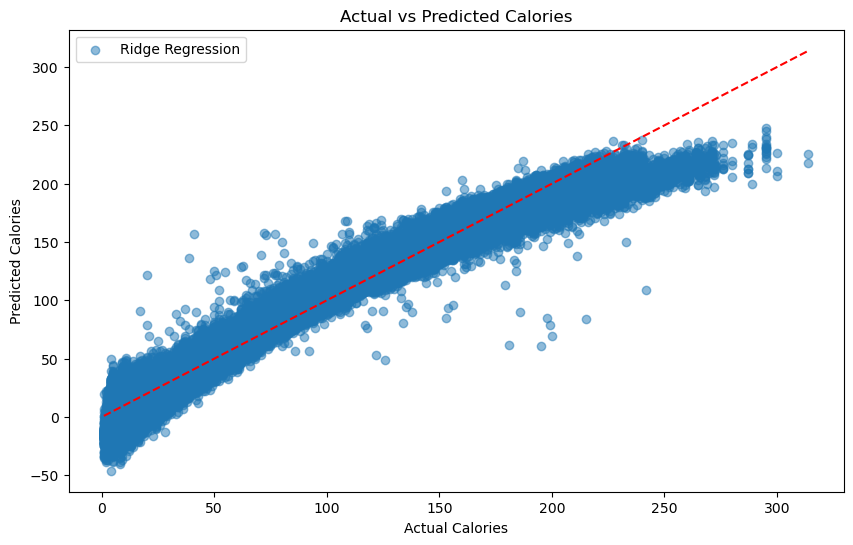

Ridge Regression Coefficients:
Age             8.077926
Height         -1.881899
Weight          3.774011
Duration       56.465584
Heart_Rate     18.438160
Body_Temp     -14.192965
sex_encoded    -0.843998
dtype: float64


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load your actual dataset

train_data = pd.read_csv('data/train.csv')

le = LabelEncoder()
train_data['sex_encoded'] = le.fit_transform(train_data['Sex'])

# Define features and target
features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'sex_encoded']
target = 'Calories'  # Replace with your actual target column name

X = train_data[features]
y = train_data[target]

# Data Preprocessing: Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Multicollinearity Check (Correlation Matrix)
corr_matrix = pd.DataFrame(X_scaled, columns=features).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
'''
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluation Metrics
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
rmsle_linear = np.sqrt(mean_squared_log_error(y_test, np.maximum(0, y_pred_linear)))

print(f"Linear Regression RMSE: {rmse_linear}")
print(f"Linear Regression RMSLE: {rmsle_linear}")
'''
# Hyperparameter Optimization with Ridge Regression
ridge_model = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_ridge_model = grid_search.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test)

# Evaluation for Ridge
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
rmsle_ridge = np.sqrt(mean_squared_log_error(y_test, np.maximum(0, y_pred_ridge)))

print(f"Ridge Regression RMSE: {rmse_ridge}")
print(f"Ridge Regression RMSLE: {rmsle_ridge}")

# Residual Plot
plt.figure(figsize=(10, 6))
'''
plt.scatter(y_test, y_pred_linear, alpha=0.5, label='Linear Regression')
'''
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label='Ridge Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories')
plt.legend()
plt.show()

# Feature Importance
'''
linear_coefficients = pd.Series(linear_model.coef_, index=features)
'''
ridge_coefficients = pd.Series(best_ridge_model.coef_, index=features)
'''
print("Linear Regression Coefficients:")
print(linear_coefficients)
'''
print("Ridge Regression Coefficients:")
print(ridge_coefficients)


In [9]:
test_data = pd.read_csv('data/test.csv')

In [10]:
test_data['sex_encoded'] = le.fit_transform(test_data['Sex'])

# Define features and target
features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'sex_encoded']

In [12]:

X_new = test_data[features]

# Scale the features using the same scaler used during training
X_new_scaled = scaler.transform(X_new)

# Make predictions
predictions = best_ridge_model.predict(X_new_scaled)


predictions = np.maximum(0, predictions)

# Create output DataFrame
output_df = pd.DataFrame({
    'id': test_data['id'],
    'Calories': predictions
})


# Save to CSV
output_df.to_csv('submission.csv', index=False)
